In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# 创建数据集,每隔50个就是一个整Π，围绕Π的系数不断变化
dataset = np.cos(np.arange(1000)*(20*np.pi/1000))#dataset的值域再-1~1之间。
 
# 转换数据为LSTM输入格式： dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back)])
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

# 20长度的滑动窗口进行预测
look_back = 20

# 归一化，y值域为(0,1)
dataset = (dataset+1) / 2.

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[:train_size], dataset[train_size:]
 
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
'''
    trainX.shape =  (780, 20, 1)
    testX.shape =  (180, 20, 1)
    trainY.shape =  (780,)
    testY.shape =  (180,)
'''

(780, 20)
(780,)


'\n    trainX.shape =  (780, 20, 1)\n    testX.shape =  (180, 20, 1)\n    trainY.shape =  (780,)\n    testY.shape =  (180,)\n'

In [3]:
#构建无状态LSTM模型
batch_size = 1

model = Sequential()
model.add(LSTM(32, input_shape=(20, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
 
model.compile(loss = 'mse', optimizer = 'adam')
model.fit(trainX,trainY,batch_size = batch_size,epochs=30, verbose=2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/30
 - 6s - loss: 0.0238
Epoch 2/30
 - 6s - loss: 0.0049
Epoch 3/30
 - 5s - loss: 0.0035
Epoch 4/30
 - 5s - loss: 0.0029
Epoch 5/30
 - 5s - loss: 0.0024
Epoch 6/30
 - 5s - loss: 0.0027
Epoch 7/30
 - 5s - loss: 0.0021
Epoch 8/30
 - 6s - loss: 0.0024
Epoch 9/30
 - 5s - loss: 0.0017
Epoch 10/30
 - 5s - loss: 0.0018
Epoch 11/30
 - 5s - loss: 0.0018
Epoch 12/30
 - 5s - loss: 0.0018
Epoch 13/30
 - 6s - loss: 0.0013
Epoch 14/30
 - 5s - loss: 0.0015
Epoch 15/30
 - 5s - loss: 0.0016
Epoch 16/30
 - 5s - loss: 0.0016
Epoch 17/30
 - 5s - loss: 0.0014
Epoch 18/30
 - 5s - loss: 0.0014
Epoch 19/30
 - 5s - loss: 0.0014
Epoch 20/30
 - 6s - loss: 0.0014
Epoch 21/30
 - 5s - loss: 0.0014
Epoch 22/30
 - 5s - loss: 0.0014
Epoch 23/30
 - 5s - loss: 0.0015
Epoch 24/30
 - 5s - loss: 0.0014
Epoch 25/30
 - 5s - loss: 0.0012
Epoch 26/30
 - 6s - loss: 0.0012
Epoch 27/30
 - 6s - loss: 0.0012
Epoch 28/30
 - 5s - loss: 0.0012
Epo

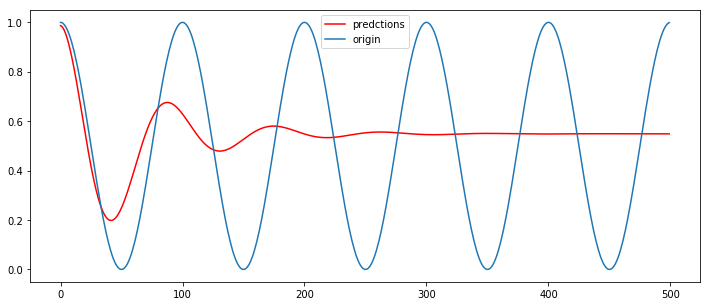

In [4]:
#从训练集的最后一个sample样本截取后面的19个+y值得1个，构成一个新的sample(20,1),来预测一个值，其实这个值就是测试集的第一个值，
x = np.vstack((trainX[-1][1:],(trainY[-1])))#vstack就是竖着拼起来
preds=[]
pred_num = 500

for i in np.arange(pred_num):
    #重新转换成适合lstm的格式，并进行预测
    pred = model.predict(x.reshape((1,-1,1)),batch_size = batch_size)
    preds.append(pred.squeeze())
    x = np.vstack((x[1:],pred))
    
#横坐标就是1~500
plt.figure(figsize=(12,5))
plt.plot(np.arange(pred_num),np.array(preds),'r',label='predctions')
cos_y = (np.cos(np.arange(pred_num)*(20*np.pi/1000))+1)/ 2.
plt.plot(np.arange(pred_num),cos_y,label='origin')
plt.legend()
plt.show()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/1
760/760 [==============================] - 8s 10ms/step - loss: 0.0222
Epoch 1/1
760/760 [==============================] - 7s 9ms/step - loss: 0.0064
Epoch 1/1
760/760 [==============================] - 7s 9ms/step - loss: 0.0044
Epoch 1/1
760/760 [==============================] - 7s 10ms/step - loss: 0.0037
Epoch 1/1
760/760 [==============================] - 7s 10ms/step - loss: 0.0038
Epoch 1/1
760/760 [==============================] - 7s 9ms/step - loss: 0.0039
Epoch 1/1
760/760 [==============================] - 7s 9ms/step - loss: 0.0029
Epoch 1/1
760/760 [==============================] - 7s 10ms/step - loss: 0.0022
Epoch 1/1
760/760 [==============================] - 7s 10ms/step - loss: 0.0021
Epoch 1/1
760/760 [==============================] - 7s 9ms/step - loss: 0.0023
Epoch 1/1
760/760 [==============================] - 7s 9ms/step - loss: 0.0026
Epoch 1/1
760/760 [==============

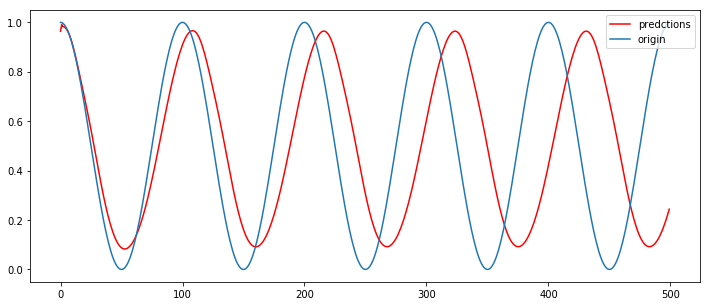

In [2]:
# 单层有状态 LSTM network
# 创建数据集,每隔50个就是一个整Π，围绕Π的系数不断变化
dataset = np.cos(np.arange(1000)*(20*np.pi/1000))#dataset的值域再-1~1之间。
 
# 转换数据为LSTM输入格式： dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back)])
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)
# 建立模型：双层stacked Stateful LSTM
look_back =40
dataset = np.cos(np.arange(1000)*(20*np.pi/1000))
#归一化，y值域为(0,1)
dataset = (dataset+1) / 2.
 
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[:train_size], dataset[train_size:]
 
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
 
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

batch_size = 1
model2 = Sequential()
model2.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model2.add(Dropout(0.2))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='adam')
for i in range(30):
    model2.fit(trainX, trainY, epochs=1, batch_size=batch_size,  shuffle=False)
    model2.reset_states()
x = np.vstack((trainX[-1][1:],(trainY[-1])))
preds = []
pred_num = 500
for i in np.arange(pred_num):
    pred = model2.predict(x.reshape((1,-1,1)),batch_size = batch_size)
    preds.append(pred.squeeze())
    x = np.vstack((x[1:],pred))

plt.figure(figsize=(12,5))
plt.plot(np.arange(pred_num),np.array(preds),'r',label='predctions')
cos_y = (np.cos(np.arange(pred_num)*(20*np.pi/1000))+1)/ 2.
plt.plot(np.arange(pred_num),cos_y,label='origin')
plt.legend()
plt.show()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
0

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


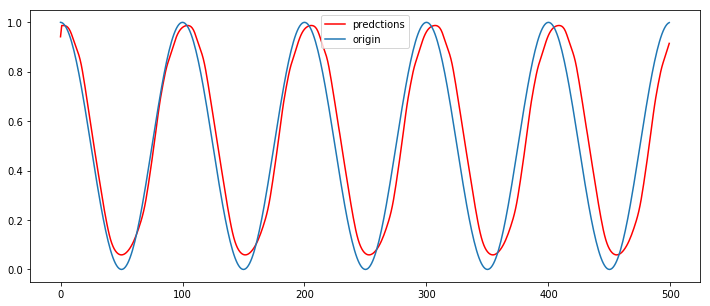

In [2]:
# 创建数据集,每隔50个就是一个整Π，围绕Π的系数不断变化
dataset = np.cos(np.arange(1000)*(20*np.pi/1000))#dataset的值域再-1~1之间。
 
# 转换数据为LSTM输入格式： dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back)])
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)
# 建立模型：双层stacked Stateful LSTM
look_back =40
dataset = np.cos(np.arange(1000)*(20*np.pi/1000))
#归一化，y值域为(0,1)
dataset = (dataset+1) / 2.
 
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[:train_size], dataset[train_size:]
 
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
 
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
 
# 建立模型：有状态
batch_size = 1
model3 = Sequential()
model3.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model3.add(Dropout(0.3))
model3.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model3.add(Dropout(0.3))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    print(i)
    model3.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
    model3.reset_states()
# 预测
x = np.vstack((trainX[-1][1:],(trainY[-1])))
preds = []
pred_num = 500
for i in np.arange(pred_num):
    pred = model3.predict(x.reshape((1,-1,1)),batch_size = batch_size)
    preds.append(pred.squeeze())
    x = np.vstack((x[1:],pred))
 
# print(preds[:20])
# print(np.array(preds).shape)
plt.figure(figsize=(12,5))
plt.plot(np.arange(pred_num),np.array(preds),'r',label='predctions')
cos_y = (np.cos(np.arange(pred_num)*(20*np.pi/1000))+1)/ 2.
plt.plot(np.arange(pred_num),cos_y,label='origin')
plt.legend()
plt.show()